# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance. 

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question. 

**Data sources:**

profiles.csv was provided by Codecademy.com. 

# Scoping

This project will be broken down into four sections. The first section is the project goals (fill in with your substance). Second section is the data being checked for duplicates, spacing, or any problematic features that could create errors in our research. Third section will analyze the data while providing insights and feedbacks. Last section is the evaluation which will help build conclusions and findings from section 3. 

## Project Goals

This project will uncover whether an OkCupid's user atrological sign can be used as predictive variable versus other features in the data. Can a prediction still be made if the user doesn't use their astrological sign. 

## Data

The project has one data set provided by Codecademy called profiles.csv. In the data, each row represents an OKCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions. 

## Analysis

This confusion matrix visual summarizes the effectiveness of a Decesion Tree Classifier with a max depth of 30 attempting to predict OKCupid's users astrological signs utilizing their body type, diet, orientation, pet status, religion, sex, and job. (95 or better in a box means the model scored high against that label) 
**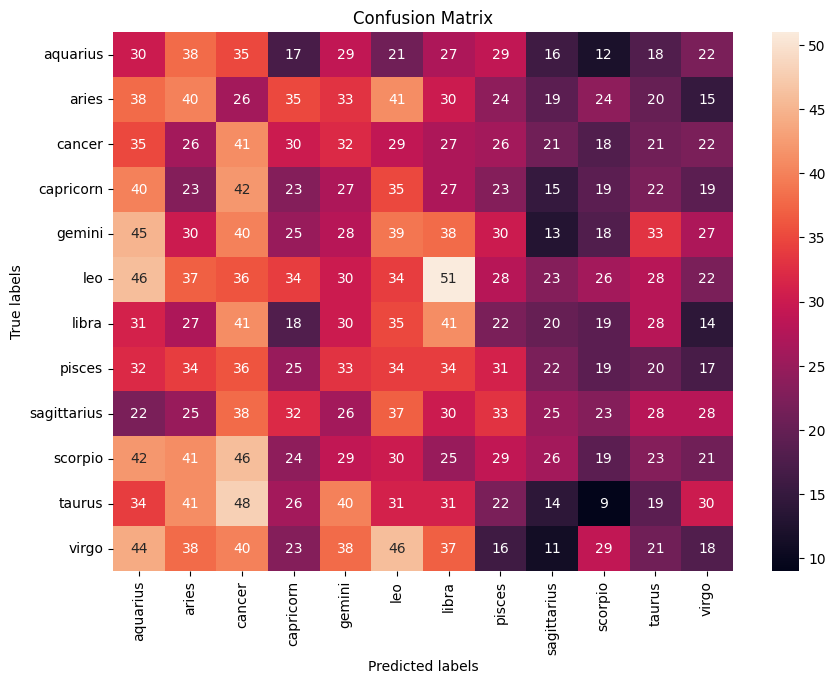** 

## Evaluation

The decision tree model selected for this project to predict the missing astrological signs from the OKCupid's users scored an underwhelming 8% accuracy on the validation sets over a 67% in the training. ~15% Precision score, ~8.5% Recall score, ~8.3% F1-Score, and 342.8 Kappa. This model would not be recommended nor would the neareast neighbor model which scored worse than the decision tree. To efficiently predict a users sign with more confidence, more data would have to be considered or stacking predictive power between multiple machine learning algorithms. 

# Import Python Modules

Importing general libraries and tools

In [121]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns


# Loading the Data

To analyze the user profiles from OKCupid, pandas will be used to load the DataFrame so that is can be explored and visualized with Python. 

Here profiles.csv is loaded into a DataFrame called profiles. The DataFrame is then briefly examined using .head() to check the contents. 

In [122]:
#Loading the csv into the variable profiles
profiles = pd.read_csv('profiles.csv')
#Showing the first 5 rows of profiles
print(profiles.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

## Gather more infomation about the data

Using pandas .info(), .describe(), & .columns functions. 

In [123]:
print(profiles.columns)
print(profiles.describe())
print(profiles.info())
print(list(profiles.columns))

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ---

## Data Characteristics

profiles has 59,946 rows and 31 columns. 
There are missing values for quite a few columns.  

The columns in the dataset include:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

# Data Exploration

First to be explored is the number of unique signs, and values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs. 

In [124]:
print("Number of categories:", profiles.sign.nunique())
print("categories:", profiles.sign.unique())

Number of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

## Cleaning labels

Using the first "word" in each label above, we can reduce the unique values from 48 to 12. Creating a new column "signsCleaned"

In [125]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
#Check work
print("Number of categories:", profiles.signsCleaned.nunique())
print("Labels:", profiles.signsCleaned.unique())

Number of categories: 12
Labels: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


# Continous Variables

### age

The next plot shows the distribution of ages in the dataset. Most users are roughly between late 20s to early 30s.

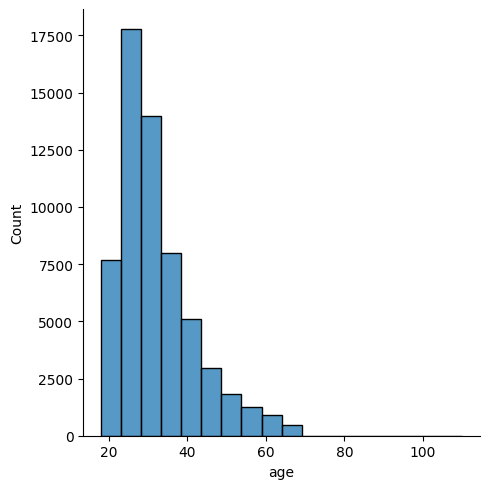

age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64


In [126]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5)
plt.show()

print(profiles.age.value_counts(ascending=False))

Same chart but broken down by gender. More males than females are using the app. 

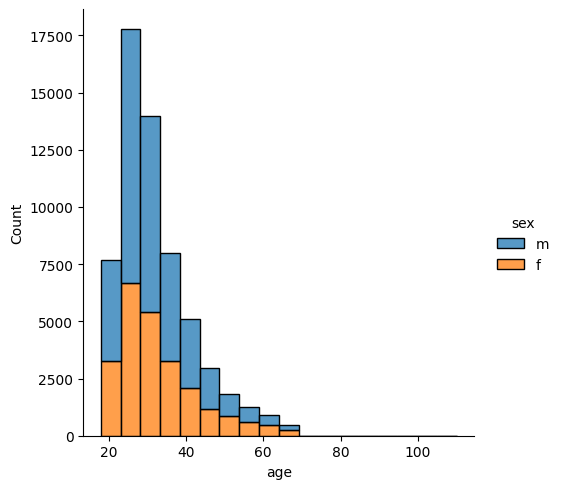

In [127]:
sns.displot(data=profiles, x='age', hue='sex', kind='hist', binwidth=5, multiple = 'stack')
plt.show()

## Height

The next plot shows the height variable, most people look like they are between 5' - 6.5' tall. 

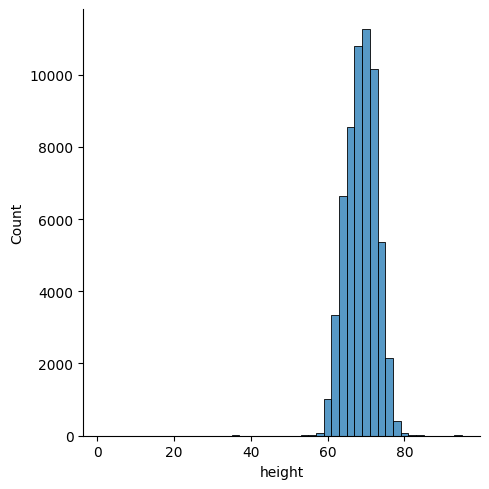

In [128]:
sns.displot(data=profiles, x='height', kind='hist', binwidth=2)
plt.show()

## Income

Here is the distribution of incomes on the app. 

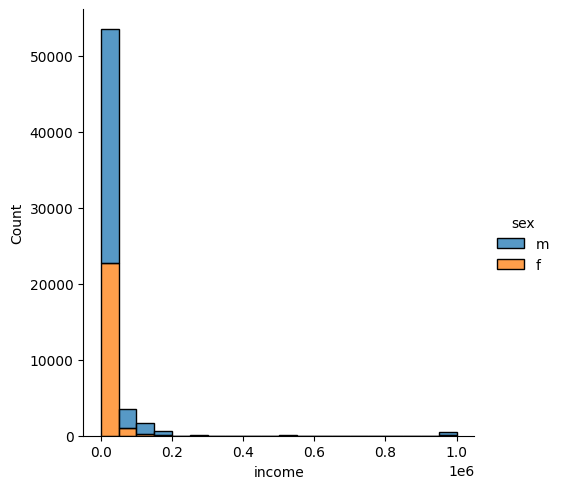

In [129]:
sns.displot(data=profiles, x='income', hue='sex', kind="hist", binwidth = 50000, multiple = 'stack')
plt.show()

**WE HAVE A MILLIONAIRE USING THE APP**


# Discrete Variables

### Sex

Just how many men are on the app to women? It's about a 1.5 males to every female. 

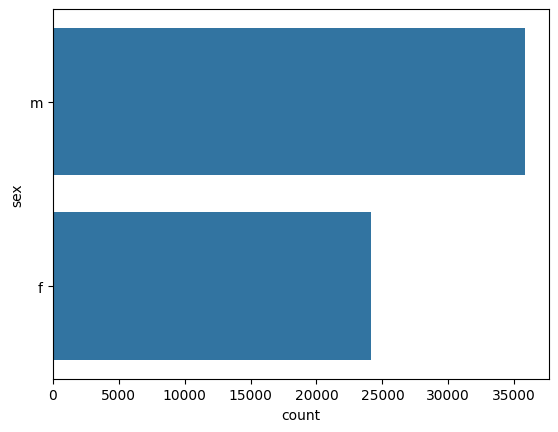

sex
m    35829
f    24117
Name: count, dtype: int64


In [130]:
sns.countplot(data=profiles, y="sex")
plt.show()

print(profiles.sex.value_counts())

## Body Type

The next chart shows the body type variable. Majority describe themselves as average, fit, or atheletic. 

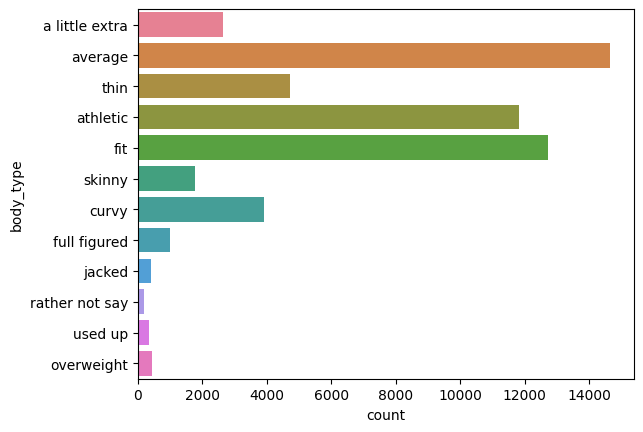

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


In [131]:

sns.countplot(data=profiles, y="body_type", hue="body_type", legend=False)
plt.show()

print(profiles.body_type.value_counts())

Next chart will show the break down of body type by gender. It showed that some of the body type descriptions are favored more by one gender over the other. For example, "curvy" and "full figured" are highly female descriptions, while males use "a little extra" and "overweight" more often. 

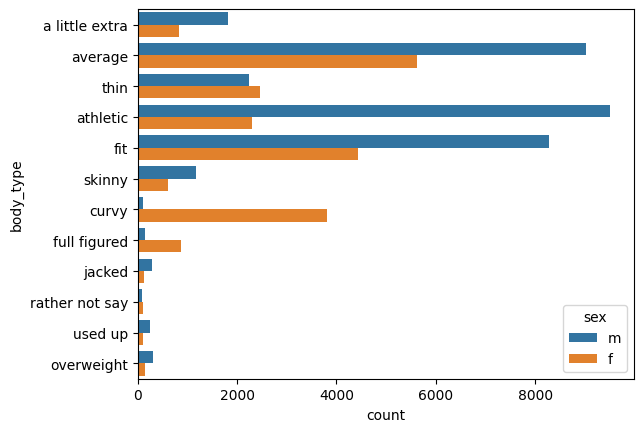

body_type  a little extra  athletic  average  curvy   fit  full figured  \
sex                                                                       
f                     821      2309     5620   3811  4431           870   
m                    1808      9510     9032    113  8280           139   

body_type  jacked  overweight  rather not say  skinny  thin  used up  
sex                                                                   
f             129         145             106     601  2469      102  
m             292         299              92    1176  2242      253  


In [132]:
sns.countplot(data=profiles, y="body_type", hue='sex')
plt.show()

print(profiles.groupby("sex")["body_type"].value_counts().unstack())

# Diet

Here is a chart of the dietary information for the users. Most users eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

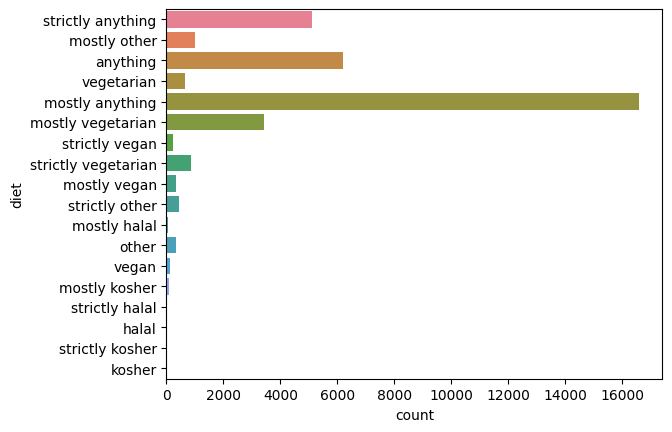

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64


In [133]:
sns.countplot(data=profiles, y="diet", hue="diet", legend=False)
plt.show()

print(profiles.diet.value_counts())

# Drinks 

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

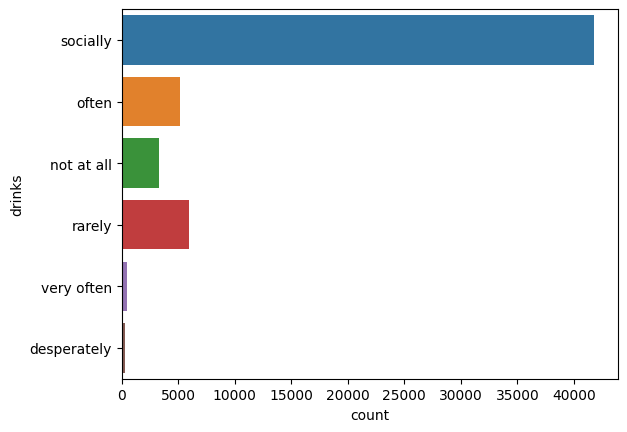

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64


In [134]:
sns.countplot(data=profiles, y="drinks", hue="drinks", legend=False)
plt.show()

print(profiles.drinks.value_counts())

# Drugs 

Majority of users "never" use drugs. 

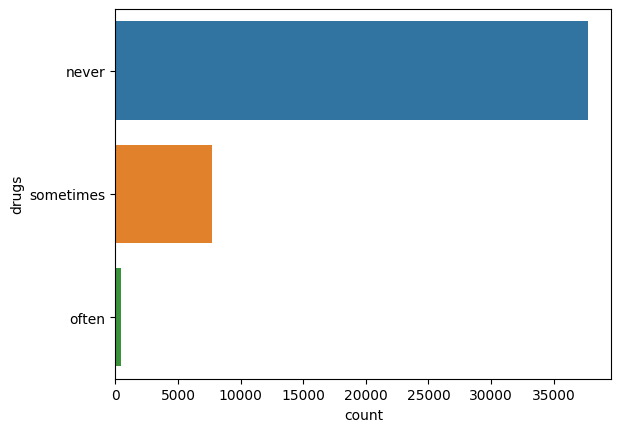

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64


In [135]:
sns.countplot(data=profiles, y="drugs", hue="drugs", legend=False)
plt.show()

print(profiles.drugs.value_counts())

# Education

Below you can view majority users are graduates from college/university followed by master programs and those working on college/university. Space camp related options are fairly popular options as well. 

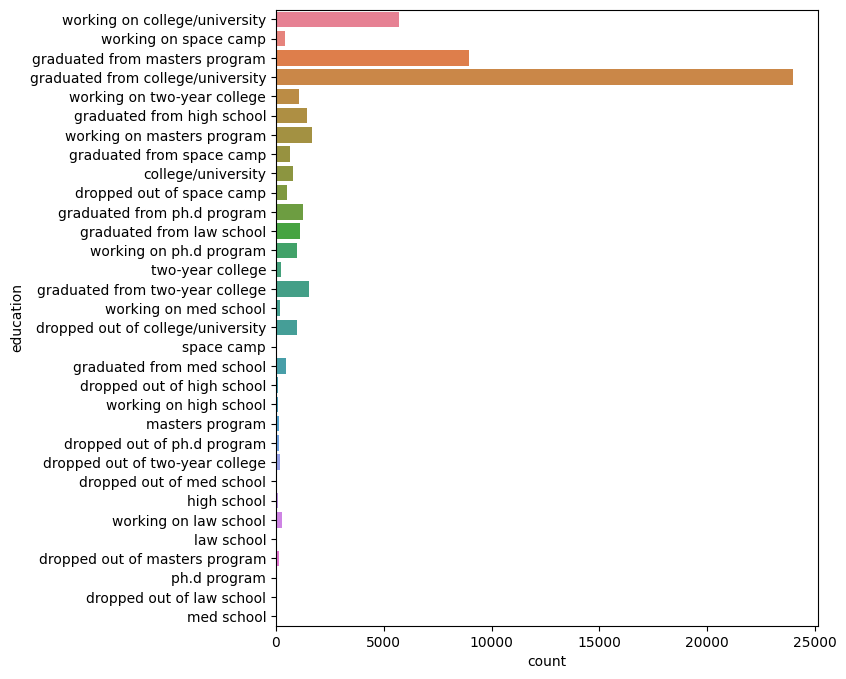

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

In [136]:
plt.figure(figsize=(7,8))
sns.countplot(data=profiles, y="education", hue="education", legend=False)
plt.show()

print(profiles.education.value_counts())

# Jobs 

Most users don't fit inot the categories provided, but there are a fair share of students, artists, tech, and business professionals. 

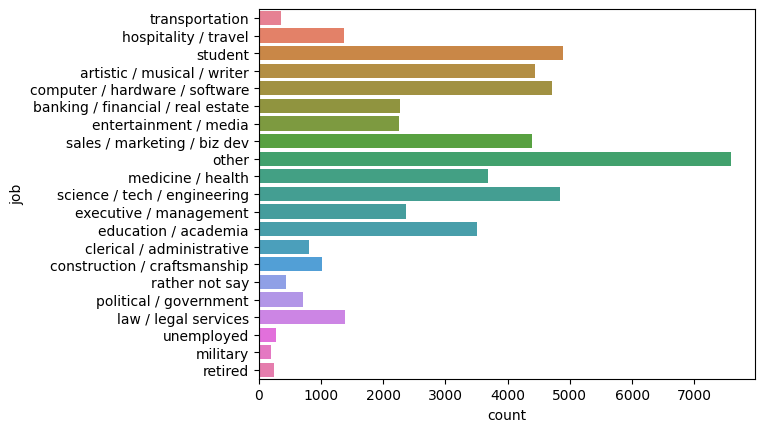

job
military                              204
retired                               250
unemployed                            273
transportation                        366
rather not say                        436
political / government                708
clerical / administrative             805
construction / craftsmanship         1021
hospitality / travel                 1364
law / legal services                 1381
entertainment / media                2250
banking / financial / real estate    2266
executive / management               2373
education / academia                 3513
medicine / health                    3680
sales / marketing / biz dev          4391
artistic / musical / writer          4439
computer / hardware / software       4709
science / tech / engineering         4848
student                              4882
other                                7589
Name: count, dtype: int64


In [137]:
sns.countplot(data=profiles, y="job", hue="job", legend=False)
plt.show()

print(profiles.job.value_counts(ascending=True))

# Offspring

The data suggests that most users do not have kids but would like them later in the relationship. 

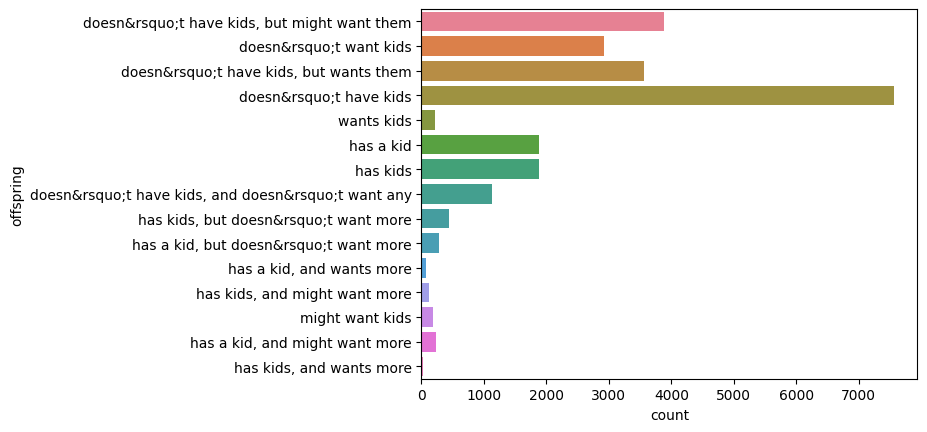

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64


In [138]:
sns.countplot(data=profiles, y="offspring", hue="offspring", legend=False)
plt.show()

print(profiles.offspring.value_counts())

# Orientation

The majority of users are straight, however if we split by "sex" we will see more female bisexual users and more gay male users. Below will show two graphs summing the whole count and then the split count. 

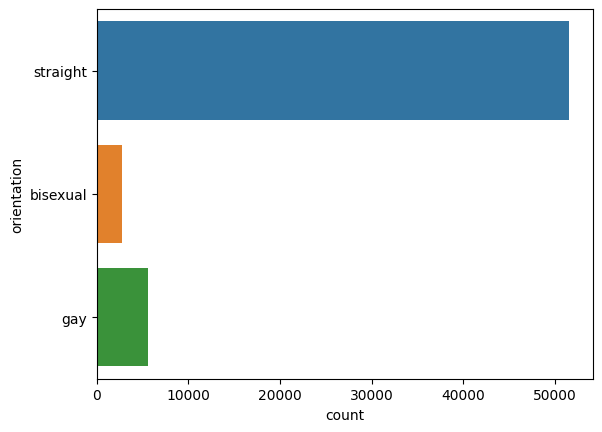

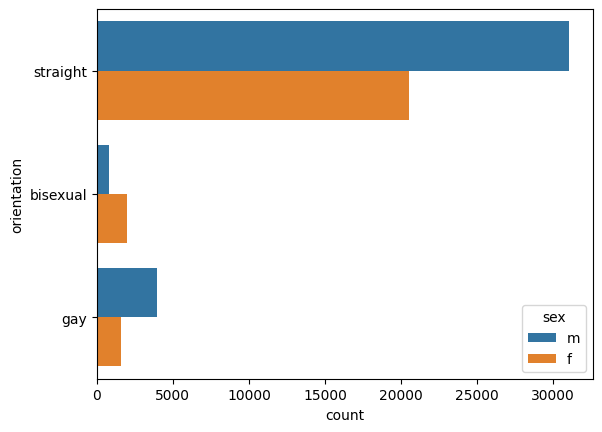

orientation  bisexual   gay  straight
sex                                  
f                1996  1588     20533
m                 771  3985     31073


In [139]:
sns.countplot(data=profiles, y="orientation", hue="orientation", legend=False)
plt.show()
plt.clf()

sns.countplot(data=profiles, y="orientation", hue="sex")
plt.show()

print(profiles.groupby("sex")["orientation"].value_counts().unstack())

# Pets

Next chart shows that most users likes dogs and cats but have more dog owners than cat owners. 

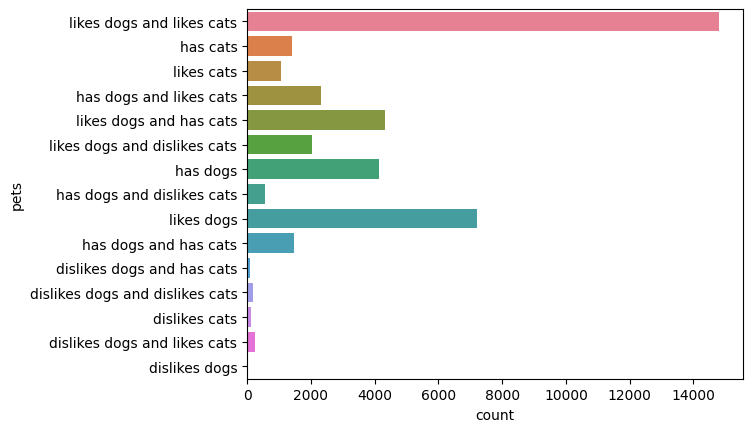

pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64


In [140]:
sns.countplot(data=profiles, y="pets", hue="pets", legend=False)
plt.show()

print(profiles.pets.value_counts(ascending=False))

# Religion

This category is very spread out with its selections. 

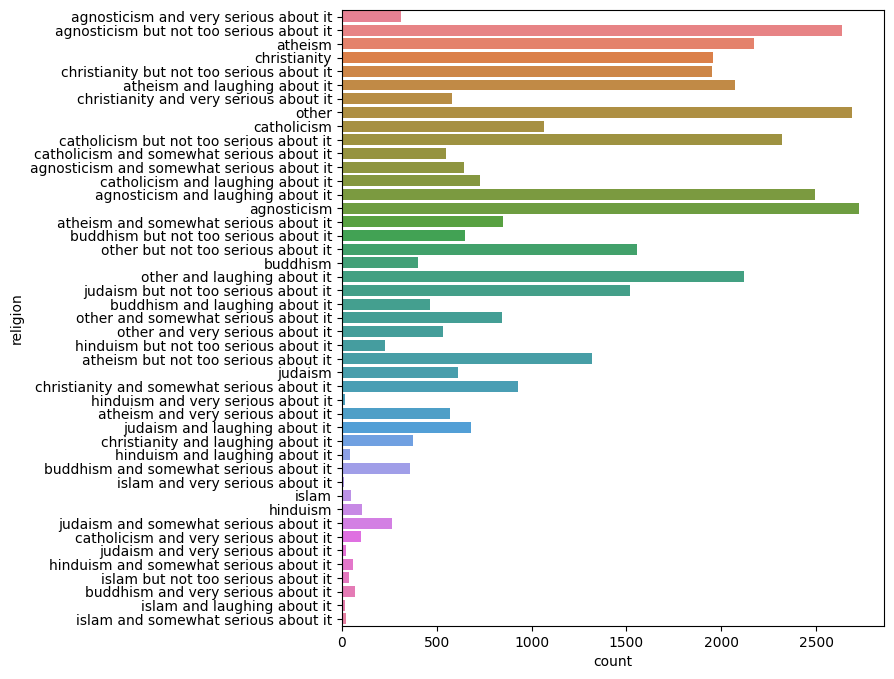

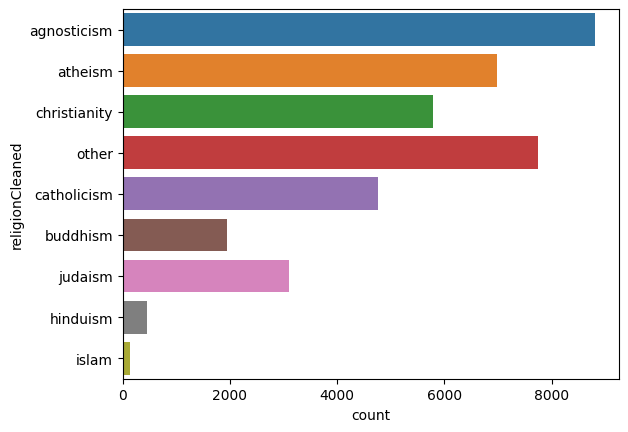

religionCleaned
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64


In [141]:
plt.figure(figsize=(7,8))
sns.countplot(data=profiles, y="religion", hue="religion", legend=False)
plt.show()
plt.clf()

#We will need to clean this column and reduce it down to the main selections for a more effective feature. The first word for each selection is a religion.
profiles["religionCleaned"] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned", hue="religionCleaned", legend=False)
plt.show()

print(profiles.religionCleaned.value_counts())

Now we can clearly see Agnosticism and Atheism runs high amongst the users. 

# Signs

Here are the astrological signs of the users. Majority are evenly distributed with Leos being most common and Capricorns being the rarest. 

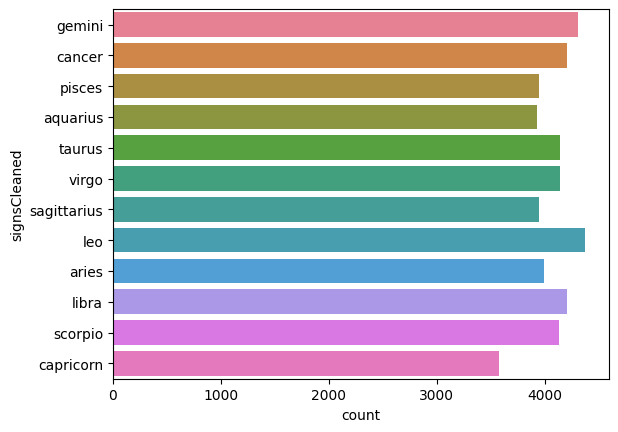

signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64


In [142]:
sns.countplot(data=profiles, y="signsCleaned", hue="signsCleaned", legend=False)
plt.show()

print(profiles.signsCleaned.value_counts(ascending=False))

## Label Imbalance

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This could lead to the machine learning algorithms being trained to give bad predicitons. 

In the given dataset, we observe the counts of all the zodiac signs are more or less equal. 

# Smoking

Similiar to "drugs" the majority of users chose "no" for smoking. 

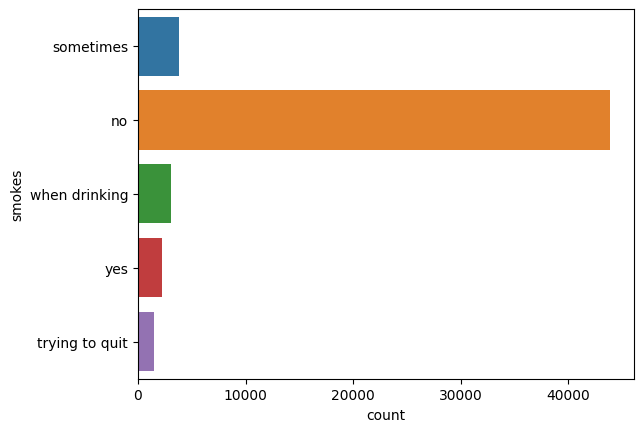

smokes
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64


In [143]:
sns.countplot(data=profiles, y="smokes", hue="smokes", legend=False)
plt.show()

print(profiles.smokes.value_counts())

# Status 

It was already safe to assume most users are single on the dating app. The data confirms it. 

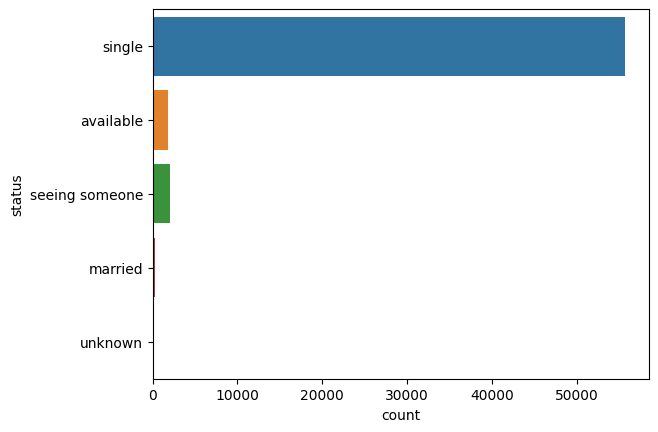

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


In [144]:
sns.countplot(data=profiles, y="status", hue="status", legend=False)
plt.show()

print(profiles.status.value_counts())


## Data Preparation

## Missing Data

In order to utilize the machine learning algorithms, any missing values need to be imputed or removed all together. 

In [145]:
print(profiles.isnull().sum())

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64


## Preprocessing

The data for the model is going to be a subset of the variables. The variables are selected because they may be a good predictor for astrological signs. Here na values are dropped to create a fully complete data set. 

In [146]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
#Check shape
print(df.shape)
# 8 columns and 16,453 rows

(16453, 8)


## Dummy Variables 

Next step is creating dummy variables with categorical variables exist. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columsn to predict signs from the original 8. 

In [147]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix=[col])

print(df.head())

  signsCleaned  body_type_a little extra  body_type_athletic  \
0       gemini                      True               False   
1       cancer                     False               False   
5       taurus                     False               False   
7  sagittarius                     False               False   
9       cancer                     False                True   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0              False            False          False                   False   
1               True            False          False                   False   
5               True            False          False                   False   
7               True            False          False                   False   
9              False            False          False                   False   

   body_type_jacked  body_type_overweight  body_type_rather not say  ...  \
0             False                 False                 

## Splitting Data

Next the data needs to be split into training and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for the training model. 

In [148]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

# Prediction

## Model Building

### K Nearest Neighbor

We will take the KNeighborsClassifier and fit it to our training set with a k-value of 5 (taking 20 of it's neighbors to predict the signs). This model had an accuracy of 33%. 

In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5,).fit(X_train, Y_train)
knn_predicitions = knn_model.predict(X_train)

#For an overview of scores, importing classification reporting
from sklearn.metrics import classification_report
print(classification_report(Y_train, knn_predicitions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.28      0.54      0.37       983
      cancer       0.30      0.43      0.35      1129
   capricorn       0.31      0.33      0.32       882
      gemini       0.35      0.30      0.32      1130
         leo       0.37      0.29      0.32      1121
       libra       0.37      0.25      0.30      1028
      pisces       0.40      0.26      0.31       997
 sagittarius       0.40      0.21      0.28       965
     scorpio       0.44      0.25      0.32      1001
      taurus       0.43      0.23      0.30      1045
       virgo       0.43      0.25      0.32      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



## Decision Trees

The next model is the decision tree. The default settings yielded a 78% accuracy on the training data. We will optimize this model further. 

In [150]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier().fit(X_train, Y_train)
dtree_predictions = dtree.predict(X_train)

print(classification_report(Y_train, dtree_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives. 

In [151]:
from sklearn.metrics import confusion_matrix

dtree_cm = confusion_matrix(Y_train, dtree_predictions)
dtree_labels = dtree.classes_

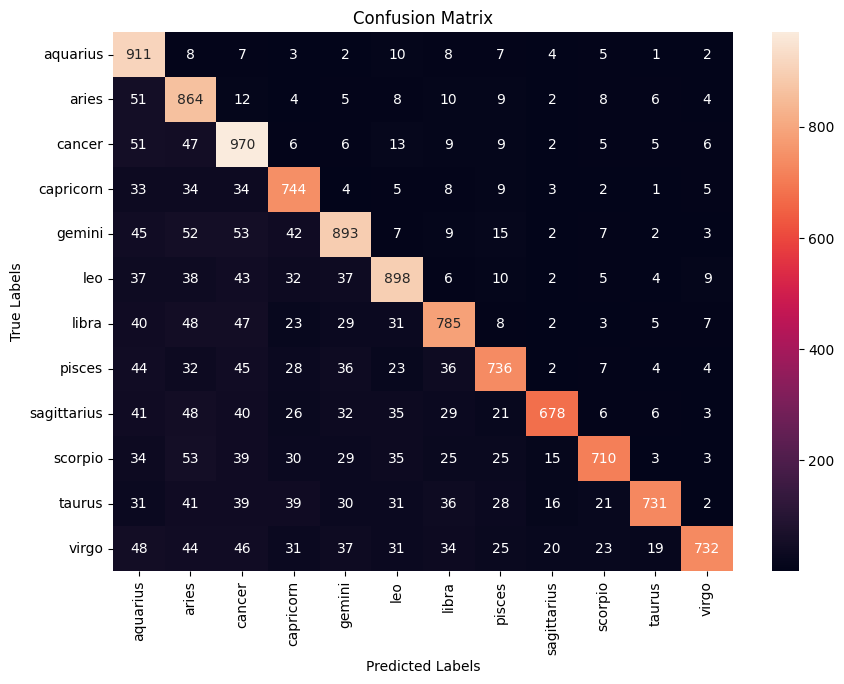

49


In [152]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(dtree_cm, annot=True, ax=ax, fmt='d')

#Labeling, titling, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_ticklabels(dtree_labels)
ax.yaxis.set_ticklabels(dtree_labels)

plt.show()

print(dtree.get_depth())

The model is being overfitted to the data to make 49 branches. To correct this and get more natural score we must prune the machine (remove any unneccessary branches). Start by setting a max depth of 30 stop the algorithm from reaching 49 stomps. It has an accuracy of 67% this time. Worse than default but still dominating the KNN model. 

In [153]:
dtree_model30 = DecisionTreeClassifier(max_depth=30).fit(X_train, Y_train)
dtree_predcitions30 = dtree_model30.predict(X_train)

print(classification_report(Y_train, dtree_predcitions30))


              precision    recall  f1-score   support

    aquarius       0.58      0.80      0.67       968
       aries       0.58      0.74      0.65       983
      cancer       0.65      0.72      0.68      1129
   capricorn       0.68      0.71      0.70       882
      gemini       0.67      0.66      0.67      1130
         leo       0.60      0.72      0.65      1121
       libra       0.56      0.67      0.61      1028
      pisces       0.72      0.59      0.65       997
 sagittarius       0.83      0.60      0.70       965
     scorpio       0.75      0.59      0.66      1001
      taurus       0.75      0.63      0.69      1045
       virgo       0.81      0.55      0.66      1090

    accuracy                           0.66     12339
   macro avg       0.68      0.67      0.67     12339
weighted avg       0.68      0.66      0.67     12339



A five fold cross validation is created with the same data to use a baseline simple predicting machine. If we check cross validation, the new model is still averaging ~9% which is not very good. 

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(dtree_model30, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


[0.08468395 0.09359806 0.09035656 0.09319287 0.0944467 ]
Baseline: 9.13% (0.36%)


Compare that to our KNN model who is averaging a ~8.6% against the KFold. The Decision Tree model with a max depth of 30 will be selected as the final model for predicting zodiac signs in OKCupid. 

In [155]:
kn_results = cross_val_score(knn_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(kn_results)
print("Baseline: %.2f%% (%.2f%%)" % (kn_results.mean()*100, kn_results.std()*100))

[0.08063209 0.09724473 0.08468395 0.0834684  0.08309688]
Baseline: 8.58% (0.59%)


## Final Model 

The model holds a 8% accuracy rating against the validation sets. Honestly that is terrible however, viewing the confusion matrix below it becomes evident that Cancer, Gemini, Leo, and Virgo were predicted most often. Often wrong. 

In [156]:
final_mod_pred = dtree_model30.predict(X_val)
print(classification_report(Y_val, final_mod_pred))

              precision    recall  f1-score   support

    aquarius       0.07      0.11      0.09       294
       aries       0.10      0.11      0.10       345
      cancer       0.09      0.13      0.11       328
   capricorn       0.08      0.09      0.08       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.09      0.09       395
       libra       0.09      0.12      0.10       326
      pisces       0.10      0.09      0.09       337
 sagittarius       0.11      0.07      0.09       347
     scorpio       0.09      0.06      0.07       355
      taurus       0.08      0.06      0.07       345
       virgo       0.08      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.09      4114
weighted avg       0.09      0.09      0.09      4114



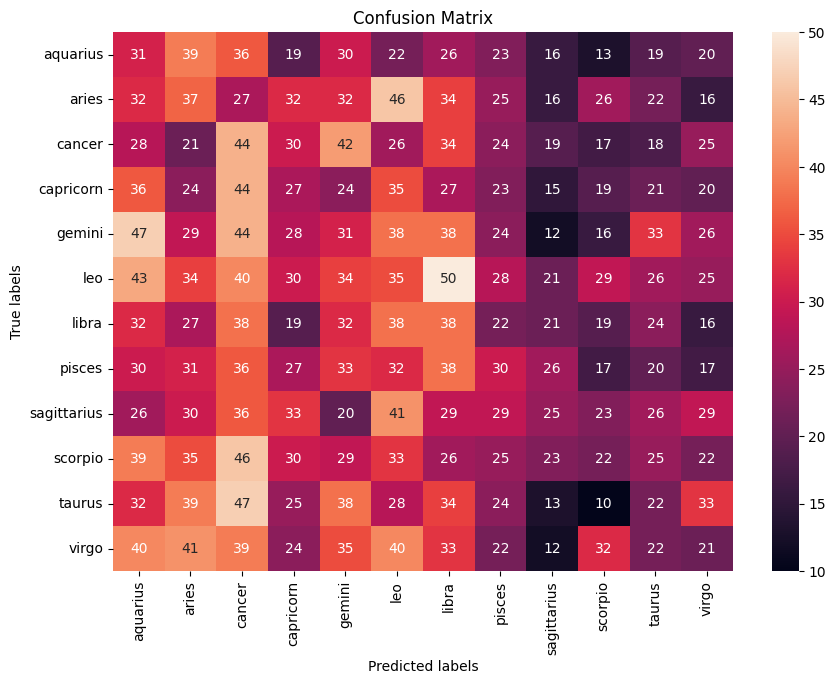

In [157]:
final_cm = confusion_matrix(Y_val, final_mod_pred)
knn_labels = dtree_model30.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels) 
ax.yaxis.set_ticklabels(knn_labels)

plt.show()

# Conclusion

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.

# Further Steps

Next steps will be to seriously consider whether it is possible to predict user's astrological signs period, or if there is a way to do it with more data (perhaps a birth month). Another possibility to add additional models to tune the hyper paramaters of the used modesl to see if any more predicitive power could be squeezed out of the algorithms. 